In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (11,6)

In [5]:
state_names = {"AL":"Alabama", "AK":"Alaska", "AZ":"Arizona", "AR":"Arkansas", "CA":"California", "CO":"Colorado", "CT":"Connecticut", 
          "DC":"Washington DC", "DE":"Delaware", "FL":"Florida", "GA":"Georgia", "HI":"Hawaii", "ID":"Idaho", "IL":"Illinois", 
          "IN":"Indiana", "IA":"Iowa", "KS":"Kansas", "KY":"Kentucky", "LA":"Louisiana", "ME":"Maine", "MD":"Maryland",
          "MA":"Massachusetts", "MI":"Michigan", "MN":"Minnesota", "MS":"Mississippi", "MO":"Missouri", "MT":"Montana",
          "NE":"Nebraska", "NV":"Nevada", "NH":"New Hampshire", "NJ":"New Jersey", "NM":"New Mexico", "NY":"New York", 
          "NC":"North Carolina", "ND":"North Dakota", "OH":"Ohio", "OK":"Oklahoma", "OR":"Oregon", "PA":"Pennsylvania", 
          "RI":"Rhode Island", "SC":"South Carolina", "SD":"South Dakota", "TN":"Tennessee", "TX":"Texas", "UT":"Utah", "VT":"Vermont",
          "VA":"Virginia", "WA":"Washington", "WV":"West Virginia","WI":"Wisconsin", "WY":"Wyoming"}

In [6]:
cases_data = pd.read_csv('us-states.csv')
# https://codeload.github.com/nytimes/covid-19-data/zip/refs/heads/master

vax_data = pd.read_csv('us-vaccines.csv')
# https://ourworldindata.org/grapher/us-daily-covid-vaccine-doses-administered

pop_data = pd.read_csv('us-pop-data.csv')
# https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-popchg2010_2019.csv

In [7]:
cases_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
23714,2021-05-07,Virginia,51,665332,10874
23715,2021-05-07,Washington,53,414434,5609
23716,2021-05-07,West Virginia,54,155680,2719
23717,2021-05-07,Wisconsin,55,665422,7625


In [8]:
pop_data = pop_data[['NAME','POPESTIMATE2019']].rename(columns={'NAME':'state', 'POPESTIMATE2019':'population'})
pop_data.head(6)

,state,population
0,United States,328239523
1,Northeast Region,55982803
2,Midwest Region,68329004
3,South Region,125580448
4,West Region,78347268
5,Alabama,4903185


In [9]:
vax_data = vax_data[['Entity','Day','daily_vaccinations']].rename(columns={'Entity':'state','Day':'date'})
vax_data

,state,date,daily_vaccinations
0,Alabama,2021-01-13,5906
1,Alabama,2021-01-14,7083
2,Alabama,2021-01-15,7478
3,Alabama,2021-01-16,7498
4,Alabama,2021-01-17,7509
...,...,...,...
7493,Wyoming,2021-05-03,1409
7494,Wyoming,2021-05-04,1786
7495,Wyoming,2021-05-05,2038
7496,Wyoming,2021-05-06,1427


In [10]:
print(sorted(cases_data['state'].unique()),'\n')
print(sorted(vax_data['state'].unique()),'\n')
print(sorted(pop_data['state'].unique()))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'] 

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'Bureau of Prisons', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Dept of Defense', 'District of Columbia', 'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indian

In [11]:
vax_data.loc[vax_data['state']=='New York State','state'] = 'New York'

In [12]:
cases_data = pd.merge(cases_data, pop_data, on='state')
cases_data

,date,state,fips,cases,deaths,population
0,2020-01-21,Washington,53,1,0,7614893
1,2020-01-22,Washington,53,1,0,7614893
2,2020-01-23,Washington,53,1,0,7614893
3,2020-01-24,Washington,53,1,0,7614893
4,2020-01-25,Washington,53,1,0,7614893
...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147
22470,2021-05-04,West Virginia,54,154551,2695,1792147
22471,2021-05-05,West Virginia,54,154956,2707,1792147
22472,2021-05-06,West Virginia,54,155341,2713,1792147


In [13]:
cases_data = pd.merge(cases_data, vax_data, on=['state','date'], how='left')
cases_data

,date,state,fips,cases,deaths,population,daily_vaccinations
0,2020-01-21,Washington,53,1,0,7614893,NaN
1,2020-01-22,Washington,53,1,0,7614893,NaN
2,2020-01-23,Washington,53,1,0,7614893,NaN
3,2020-01-24,Washington,53,1,0,7614893,NaN
4,2020-01-25,Washington,53,1,0,7614893,NaN
...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0


In [14]:
cases_data.loc[cases_data['state']=='New York']

,date,state,fips,cases,deaths,population,daily_vaccinations
5003,2020-03-01,New York,36,1,0,19453561,NaN
5004,2020-03-02,New York,36,1,0,19453561,NaN
5005,2020-03-03,New York,36,2,0,19453561,NaN
5006,2020-03-04,New York,36,11,0,19453561,NaN
5007,2020-03-05,New York,36,22,0,19453561,NaN
...,...,...,...,...,...,...,...
5431,2021-05-03,New York,36,2055467,51889,19453561,172633.0
5432,2021-05-04,New York,36,2057701,51949,19453561,170878.0
5433,2021-05-05,New York,36,2060075,52005,19453561,170210.0
5434,2021-05-06,New York,36,2062707,52038,19453561,163113.0


In [15]:
cases_data['total_vaccinations'] = cases_data.groupby('state')['daily_vaccinations'].cumsum()
cases_data

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations
0,2020-01-21,Washington,53,1,0,7614893,NaN,NaN
1,2020-01-22,Washington,53,1,0,7614893,NaN,NaN
2,2020-01-23,Washington,53,1,0,7614893,NaN,NaN
3,2020-01-24,Washington,53,1,0,7614893,NaN,NaN
4,2020-01-25,Washington,53,1,0,7614893,NaN,NaN
...,...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0,1089991.0
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0,1096533.0
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0,1102339.0
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0,1107602.0


In [16]:
cases_data['vaccinations_as_ratio'] = 1.00*cases_data['total_vaccinations']/cases_data['population']
state_data = cases_data
state_data

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations,vaccinations_as_ratio
0,2020-01-21,Washington,53,1,0,7614893,NaN,NaN,NaN
1,2020-01-22,Washington,53,1,0,7614893,NaN,NaN,NaN
2,2020-01-23,Washington,53,1,0,7614893,NaN,NaN,NaN
3,2020-01-24,Washington,53,1,0,7614893,NaN,NaN,NaN
4,2020-01-25,Washington,53,1,0,7614893,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0,1089991.0,0.608204
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0,1096533.0,0.611854
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0,1102339.0,0.615094
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0,1107602.0,0.618031


In [17]:
state_data

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations,vaccinations_as_ratio
0,2020-01-21,Washington,53,1,0,7614893,NaN,NaN,NaN
1,2020-01-22,Washington,53,1,0,7614893,NaN,NaN,NaN
2,2020-01-23,Washington,53,1,0,7614893,NaN,NaN,NaN
3,2020-01-24,Washington,53,1,0,7614893,NaN,NaN,NaN
4,2020-01-25,Washington,53,1,0,7614893,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0,1089991.0,0.608204
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0,1096533.0,0.611854
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0,1102339.0,0.615094
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0,1107602.0,0.618031


In [18]:
state_data['new_cases'] = 0
state_data['new_deaths'] = 0

for s in state_data['state'].unique():
    first_i_of_s = state_data.loc[state_data['state']==s].head(1).index[0]
    state_data.loc[state_data['state']==s, 'new_cases'] = state_data['cases']-state_data['cases'].shift(1)
    state_data.loc[first_i_of_s,'new_cases'] = state_data.iloc[first_i_of_s]['cases']
    state_data.loc[state_data['state']==s, 'new_deaths'] = state_data['deaths']-state_data['deaths'].shift(1)
    state_data.loc[first_i_of_s,'new_deaths'] = state_data.iloc[first_i_of_s]['deaths']
    

In [19]:
for s in state_data['state'].unique():
    state_data.loc[state_data['state']==s, 'new_cases_smooth'] = state_data.loc[state_data['state']==s, 'new_cases'].rolling(window=14).mean()
    state_data.loc[state_data['state']==s, 'new_deaths_smooth'] = state_data.loc[state_data['state']==s, 'new_deaths'].rolling(window=14).mean()

state_data['new_cases_difference'] = 0
state_data['new_deaths_difference'] = 0

for s in state_data['state'].unique():
    first_i_of_s = state_data.loc[state_data['state']==s].head(1).index[0]
    state_data.loc[state_data['state']==s, 'new_cases_difference'] = state_data['new_cases_smooth']-state_data['new_cases_smooth'].shift(1)
    state_data.loc[first_i_of_s,'new_cases_difference'] = state_data.iloc[first_i_of_s]['new_cases_smooth'] 
    state_data.loc[state_data['state']==s, 'new_deaths_difference'] = state_data['new_deaths_smooth']-state_data['new_deaths_smooth'].shift(1)
    state_data.loc[first_i_of_s,'new_deaths_difference'] = state_data.iloc[first_i_of_s]['new_deaths_smooth']
    

In [20]:
for s in state_data['state'].unique():
    state_data.loc[state_data['state']==s, 'new_cases_difference_smooth'] = state_data.loc[state_data['state']==s, 'new_cases_difference'].rolling(window=14).mean()
    state_data.loc[state_data['state']==s, 'new_deaths_difference_smooth'] = state_data.loc[state_data['state']==s, 'new_deaths_difference'].rolling(window=14).mean()

In [21]:
state_data

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations,vaccinations_as_ratio,new_cases,new_deaths,new_cases_smooth,new_deaths_smooth,new_cases_difference,new_deaths_difference,new_cases_difference_smooth,new_deaths_difference_smooth
0,2020-01-21,Washington,53,1,0,7614893,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-25,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0,1089991.0,0.608204,289.0,0.0,361.428571,-7.071429,2.071429,0.000000,-1.806122,-0.959184
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0,1096533.0,0.611854,344.0,9.0,363.500000,-6.714286,2.071429,0.357143,-1.852041,-0.897959
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0,1102339.0,0.615094,405.0,12.0,362.000000,-6.642857,-1.500000,0.071429,-2.275510,-0.872449
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0,1107602.0,0.618031,385.0,6.0,360.928571,-6.785714,-1.071429,-0.142857,-2.117347,-0.857143


In [22]:
state_data.loc[state_data['state']=='New York']

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations,vaccinations_as_ratio,new_cases,new_deaths,new_cases_smooth,new_deaths_smooth,new_cases_difference,new_deaths_difference,new_cases_difference_smooth,new_deaths_difference_smooth
5003,2020-03-01,New York,36,1,0,19453561,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5004,2020-03-02,New York,36,1,0,19453561,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5005,2020-03-03,New York,36,2,0,19453561,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5006,2020-03-04,New York,36,11,0,19453561,NaN,NaN,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5007,2020-03-05,New York,36,22,0,19453561,NaN,NaN,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,2021-05-03,New York,36,2055467,51889,19453561,172633.0,15175027.0,0.780064,2440.0,59.0,3815.285714,54.785714,-195.500000,1.000000,-192.760204,-0.816327
5432,2021-05-04,New York,36,2057701,51949,19453561,170878.0,15345905.0,0.788848,2234.0,60.0,3642.071429,54.714286,-173.214286,-0.071429,-197.750000,-0.908163
5433,2021-05-05,New York,36,2060075,52005,19453561,170210.0,15516115.0,0.797598,2374.0,56.0,3507.714286,55.500000,-134.357143,0.785714,-196.147959,-0.607143
5434,2021-05-06,New York,36,2062707,52038,19453561,163113.0,15679228.0,0.805982,2632.0,33.0,3318.785714,52.785714,-188.928571,-2.714286,-192.020408,-0.877551


In [23]:
state_history = pd.read_csv('all-states-history.csv')
# https://covidtracking.com/data/download

state_history = state_history[['date','state','hospitalized','hospitalizedCurrently','hospitalizedIncrease']]
state_history

,date,state,hospitalized,hospitalizedCurrently,hospitalizedIncrease
0,2021-03-07,AK,1293.0,33.0,0
1,2021-03-07,AL,45976.0,494.0,0
2,2021-03-07,AR,14926.0,335.0,11
3,2021-03-07,AS,NaN,NaN,0
4,2021-03-07,AZ,57907.0,963.0,44
...,...,...,...,...,...
20775,2020-01-17,WA,NaN,NaN,0
20776,2020-01-16,WA,NaN,NaN,0
20777,2020-01-15,WA,NaN,NaN,0
20778,2020-01-14,WA,NaN,NaN,0


In [24]:
for s in state_history['state'].unique():
    if s in state_names:
        state_history.loc[state_history['state']==s, 'state'] = state_names[s]
    
state_history

,date,state,hospitalized,hospitalizedCurrently,hospitalizedIncrease
0,2021-03-07,Alaska,1293.0,33.0,0
1,2021-03-07,Alabama,45976.0,494.0,0
2,2021-03-07,Arkansas,14926.0,335.0,11
3,2021-03-07,AS,NaN,NaN,0
4,2021-03-07,Arizona,57907.0,963.0,44
...,...,...,...,...,...
20775,2020-01-17,Washington,NaN,NaN,0
20776,2020-01-16,Washington,NaN,NaN,0
20777,2020-01-15,Washington,NaN,NaN,0
20778,2020-01-14,Washington,NaN,NaN,0


In [25]:
data_with_hospital = pd.merge(state_data, state_history, on=['state','date'], how='left')
data_with_hospital

,date,state,fips,cases,deaths,population,daily_vaccinations,total_vaccinations,vaccinations_as_ratio,new_cases,new_deaths,new_cases_smooth,new_deaths_smooth,new_cases_difference,new_deaths_difference,new_cases_difference_smooth,new_deaths_difference_smooth,hospitalized,hospitalizedCurrently,hospitalizedIncrease
0,2020-01-21,Washington,53,1,0,7614893,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-22,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-23,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-01-24,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-25,Washington,53,1,0,7614893,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22469,2021-05-03,West Virginia,54,154207,2686,1792147,6643.0,1089991.0,0.608204,289.0,0.0,361.428571,-7.071429,2.071429,0.000000,-1.806122,-0.959184,NaN,NaN,NaN
22470,2021-05-04,West Virginia,54,154551,2695,1792147,6542.0,1096533.0,0.611854,344.0,9.0,363.500000,-6.714286,2.071429,0.357143,-1.852041,-0.897959,NaN,NaN,NaN
22471,2021-05-05,West Virginia,54,154956,2707,1792147,5806.0,1102339.0,0.615094,405.0,12.0,362.000000,-6.642857,-1.500000,0.071429,-2.275510,-0.872449,NaN,NaN,NaN
22472,2021-05-06,West Virginia,54,155341,2713,1792147,5263.0,1107602.0,0.618031,385.0,6.0,360.928571,-6.785714,-1.071429,-0.142857,-2.117347,-0.857143,NaN,NaN,NaN


In [26]:
input_data = state_data
input_data.loc[input_data['new_deaths']<0, 'new_deaths'] = 0
input_data.loc[input_data['new_cases']<0, 'new_cases'] = 0
input_data.loc[input_data['new_deaths_smooth']<0, 'new_deaths_smooth'] = 0
input_data.loc[input_data['new_cases_smooth']<0, 'new_cases_smooth'] = 0


def plot_vaccination_v_casesdeaths(state, amplify=100, offset=10, smooth=False):
    state_data = input_data.loc[input_data['state']==state]
    
    fig, ax1 = plt.subplots() 
    fig.suptitle(state, fontsize=20, fontweight='bold')
    
    ax1.plot( pd.to_datetime(state_data['date']), state_data['new_cases_smooth'], color='y', linewidth=4) if smooth else ax1.plot( pd.to_datetime(state_data['date']), state_data['new_cases'], color='y', linewidth=4)
    ax1.plot( pd.to_datetime(state_data['date']) - pd.tseries.offsets.Day(offset), amplify*state_data['new_deaths_smooth'], color='r') if smooth else ax1.plot( pd.to_datetime(state_data['date']) - pd.tseries.offsets.Day(offset), amplify*state_data['new_deaths'], color='r')
    plt.xticks( rotation=80)
    ax1.grid()
    ax1.legend(['Cases (real)','Deaths (modified)'], prop={'size':14}, loc='center left')
    ax1.set_ylabel('Number of People', fontsize=15)
    
    ax2 = ax1.twinx()
    
    ax2.yaxis.tick_right()
    ax2.plot( pd.to_datetime(state_data['date']), state_data['total_vaccinations']/state_data['population'], color='b', linewidth=7, alpha=0.4)
    #ax2.plot( pd.to_datetime(state_data['date']), state_data['people_fully_vaccinated']/state_data['population'], color='g', linewidth=7, alpha=0.4)
    ax2.legend(['Vaccine Doses as Ratio'], prop={'size':14}, loc='upper center')
    ax2.set_ylabel('Ratio', fontsize=15, rotation=-90)
    ax2.set_ylim([-0.1,1.1])
    
    
def plot_vaccination_v_casesdeaths_differences(state, offset=0, smooth=False):
    state_data = input_data.loc[input_data['state']==state]
    
    fig, ax1 = plt.subplots() 
    fig.suptitle(state + ' CHANGE', fontsize=20, fontweight='bold')
    
    ax1.plot( pd.to_datetime(state_data['date']), state_data['new_cases_difference_smooth']/(abs(state_data['new_cases_difference_smooth']).max()), color='y', linewidth=4) if smooth else ax1.plot( pd.to_datetime(state_data['date']), state_data['new_cases_difference']/(abs(state_data['new_cases_difference']).max()), color='y', linewidth=4)
    ax1.plot( pd.to_datetime(state_data['date']) - pd.tseries.offsets.Day(offset), state_data['new_deaths_difference_smooth']/(abs(state_data['new_deaths_difference_smooth']).max()), color='r') if smooth else ax1.plot( pd.to_datetime(state_data['date']) - pd.tseries.offsets.Day(offset), state_data['new_deaths_difference']/(abs(state_data['new_deaths_difference']).max()), color='r')
    plt.xticks( rotation=80)
    ax1.grid()
    ax1.legend(['Δ of New Cases (magnitude)','Δ of New Deaths'], prop={'size':14}, loc='lower left')
    ax1.set_ylabel('Magnitude Change (Min-Max)', fontsize=15)
    ax1.hlines(0,ax1.get_xticks().min(), ax1.get_xticks().max(), linewidth=4, alpha=0.65)
    
    ax2 = ax1.twinx()
    
    ax2.yaxis.tick_right()
    ax2.plot( pd.to_datetime(state_data['date']), state_data['total_vaccinations']/state_data['population'], color='b', linewidth=7, alpha=0.4)
    #ax2.plot( pd.to_datetime(country_data['date']), country_data['people_fully_vaccinated']/country_data['population'], color='g', linewidth=7, alpha=0.4)
    ax2.legend(['Vaccine Doses as Ratio'], prop={'size':14}, loc='upper left')
    ax2.set_ylabel('Ratio', fontsize=15, rotation=-90)
    ax2.set_ylim([-0.1,1.1])
    
    
def plot_vaccination_v_hospitalizations(state, offset=0):
    state_data = data_with_hospital.loc[data_with_hospital['state']==state]
    
    fig, ax1 = plt.subplots()
    fig.suptitle(state + ' w/ Hospital.', fontsize=20, fontweight='bold')
    
    ax1.plot( pd.to_datetime(state_data['date']), state_data['hospitalizedCurrently'], color='purple', linewidth=2) 
    plt.xticks(rotation=80)
    ax1.grid()
    ax1.legend(['Current Hospitalized Patients'], prop={'size':14}, loc="upper left")
    ax1.set_ylabel('Number of People', fontsize=15) 
    
    ax2 = ax1.twinx()
    
    ax2.yaxis.tick_right()
    ax2.plot( pd.to_datetime(state_data['date']), state_data['total_vaccinations']/state_data['population'], color='b', linewidth=7, alpha=0.4)
    ax2.plot( pd.to_datetime(state_data['date']), 5*state_data['deaths']/state_data['cases'], color='black', linestyle='dotted', linewidth=2 )
    ax2.plot( pd.to_datetime(state_data['date']), (5*state_data['new_deaths'].shift(offset)/state_data['new_cases']).rolling(window=10).mean(), color='orange', linestyle='dashed', linewidth=2, alpha=0.4)
    #ax2.plot( pd.to_datetime(country_data['date']), country_data['people_fully_vaccinated']/country_data['population'], color='g', linewidth=7, alpha=0.4)
    ax2.legend(['Vaccine Doses as Ratio', 'Death Rate from Totals x5', 'Death Rate from New Cases x5'], prop={'size':14}, loc='upper right')
    ax2.set_ylabel('Ratio OR Death Rate x5', fontsize=15, rotation=-50)
    ax2.set_ylim([-0.1,1.1])
    ax2.hlines([5*0.005, 5*0.01, 5*0.015, 5*0.02], ax2.get_xticks().min(), ax2.get_xticks().max(), linewidth=0.75, color='g')

In [27]:
def plot_all_info(state,amplify=50,offset=0,smooth=True):
    plot_vaccination_v_casesdeaths(state, amplify, offset, smooth)
    plot_vaccination_v_casesdeaths_differences(state, offset, smooth)
    plot_vaccination_v_hospitalizations(state, offset)

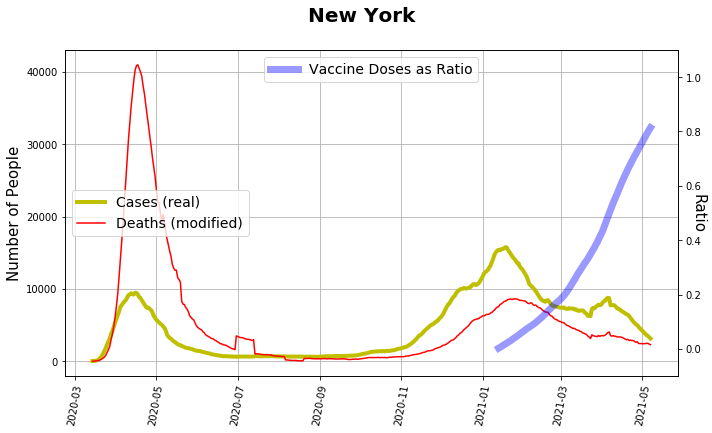

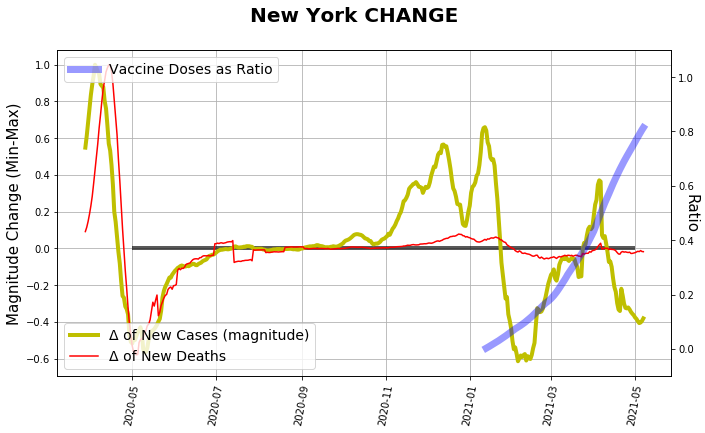

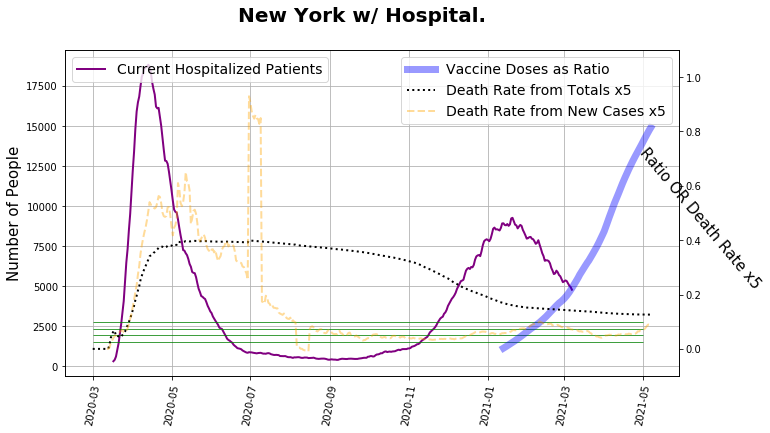

In [28]:
plot_all_info('New York', amplify=45, offset=0, smooth=True)

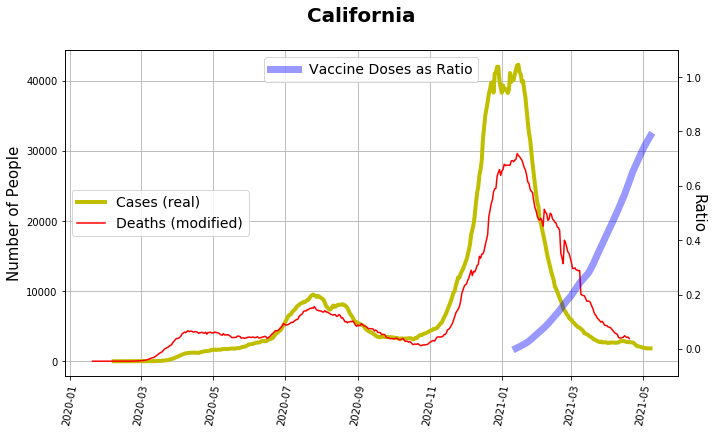

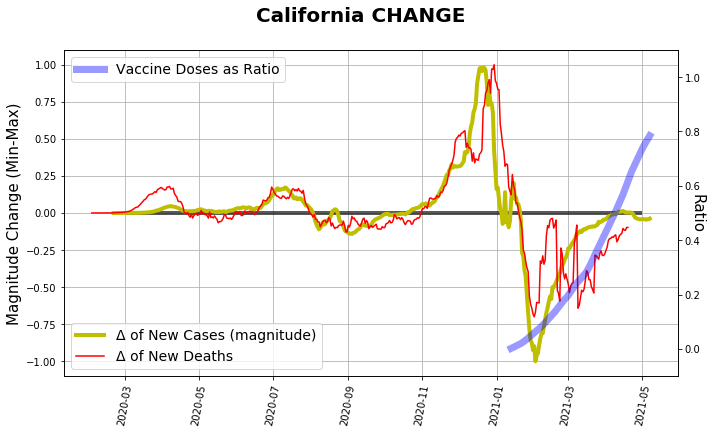

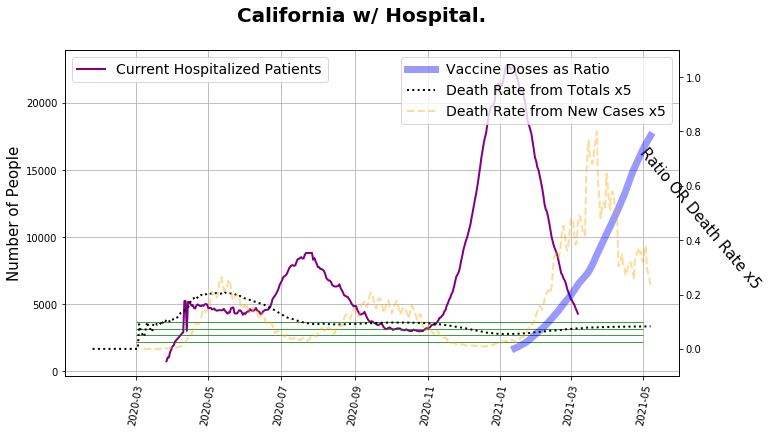

In [29]:
plot_all_info('California', amplify=55, offset=18, smooth=True)

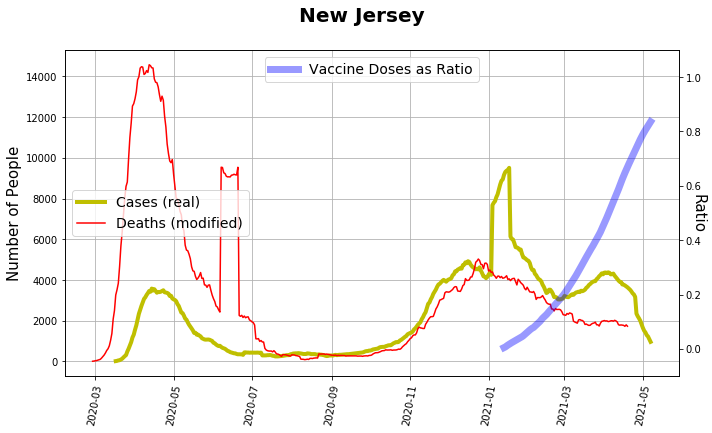

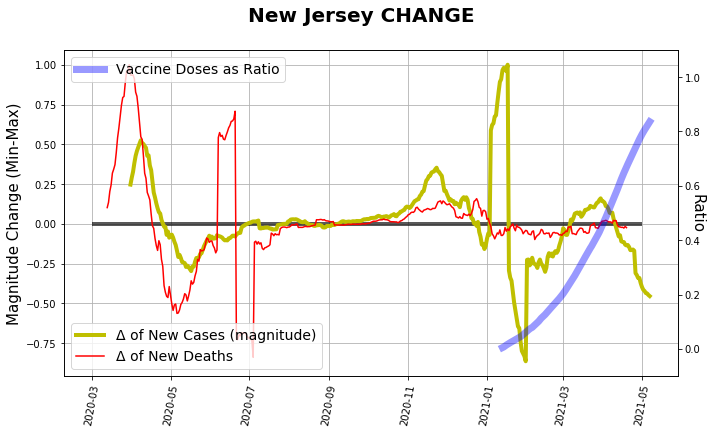

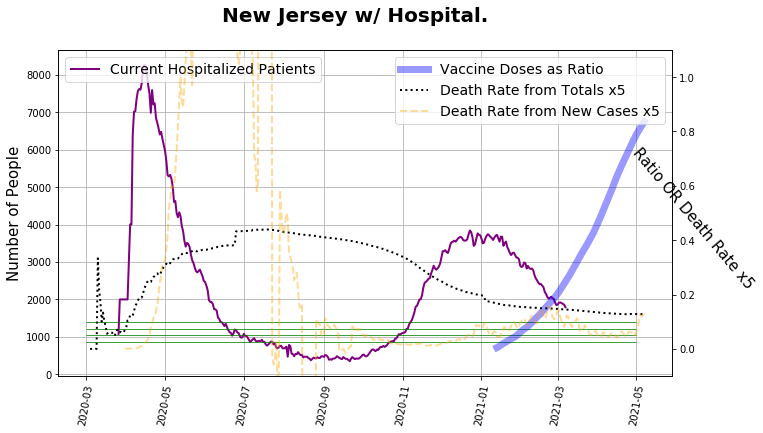

In [30]:
plot_all_info('New Jersey', amplify=55, offset=18, smooth=True)

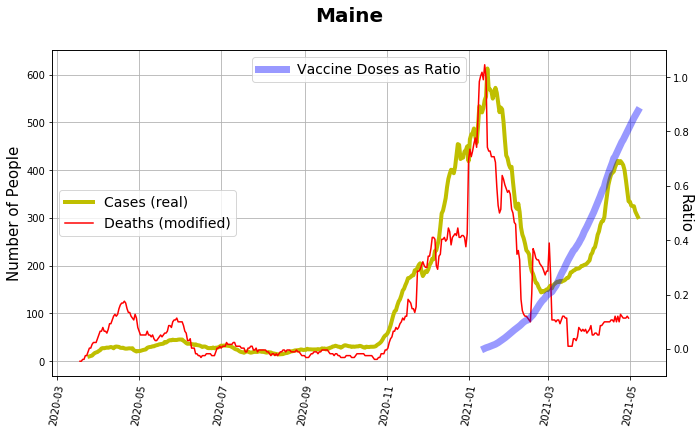

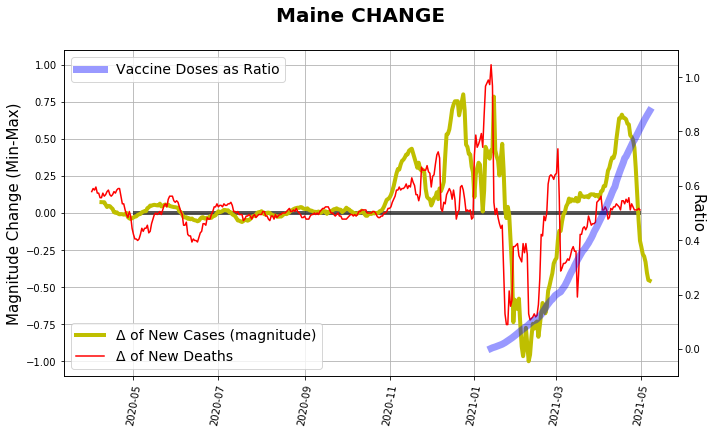

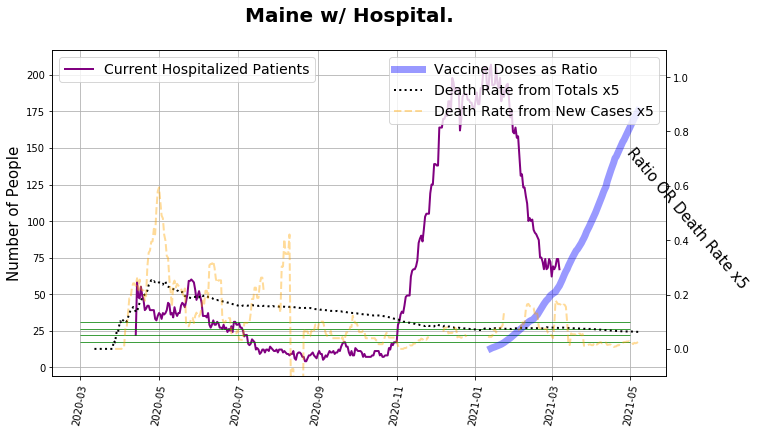

In [31]:
plot_all_info('Maine', amplify=55, offset=7, smooth=True)

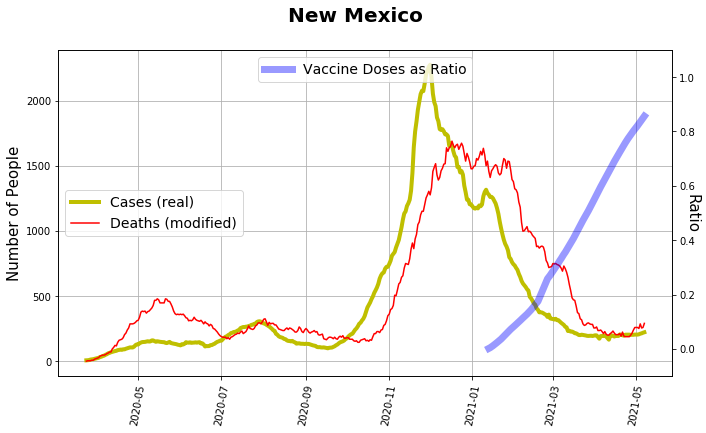

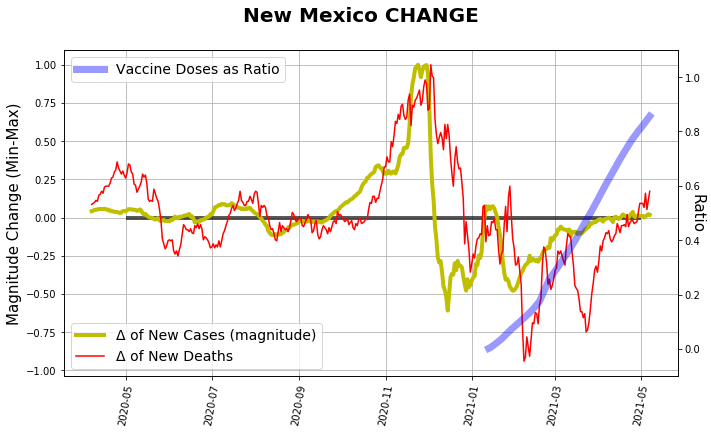

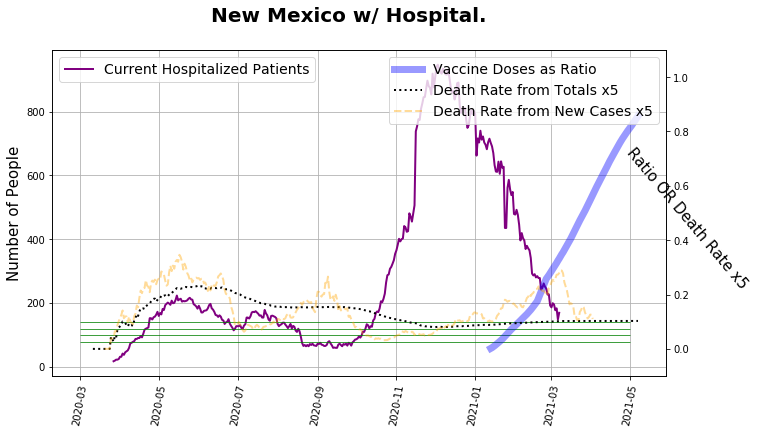

In [40]:
plot_all_info('New Mexico', amplify=55, offset=0, smooth=True)

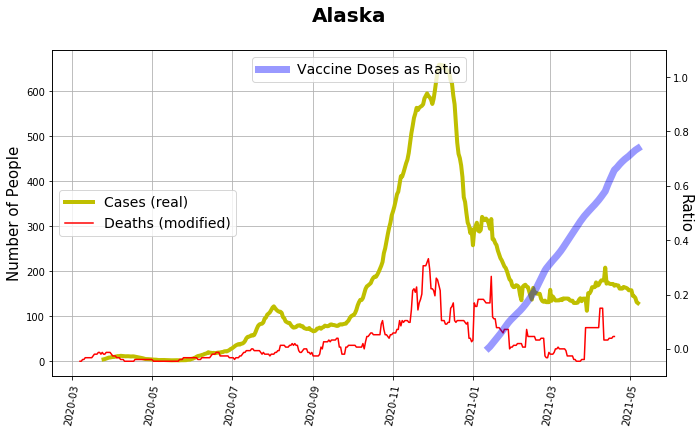

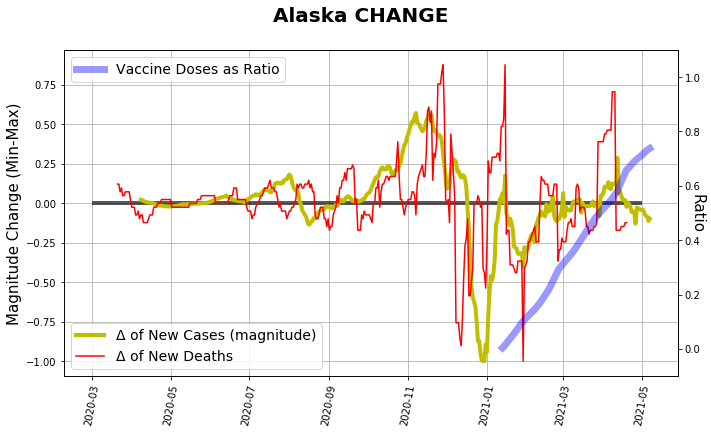

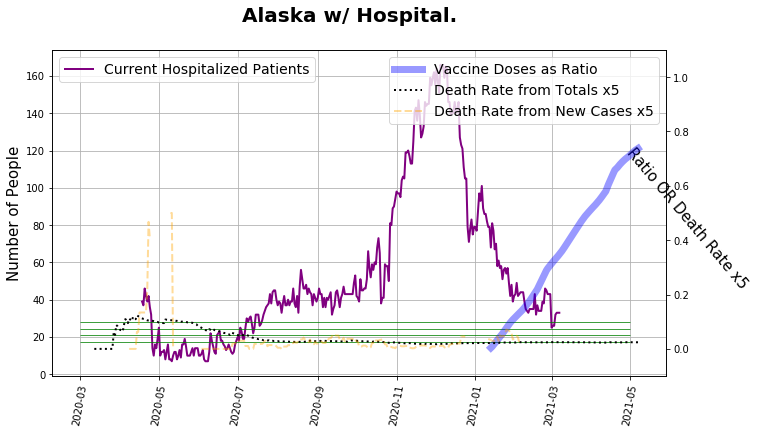

In [33]:
plot_all_info('Alaska', amplify=55, offset=18, smooth=True)

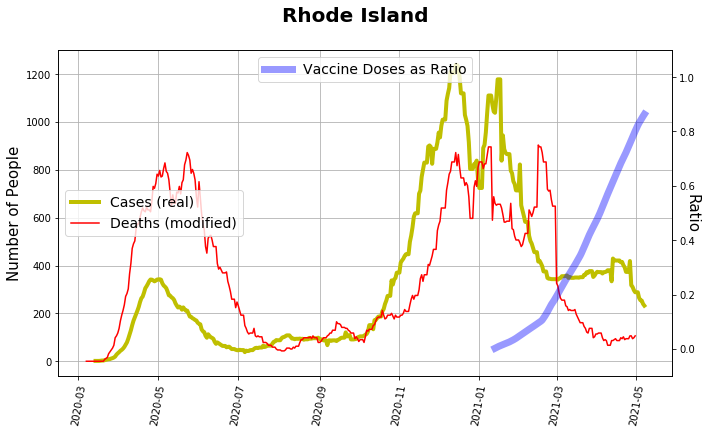

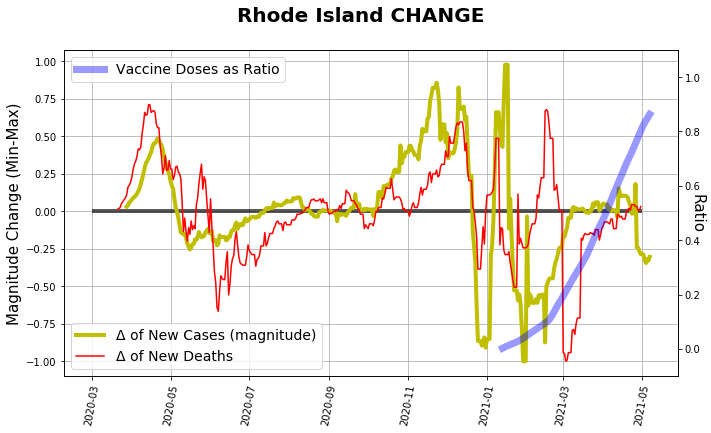

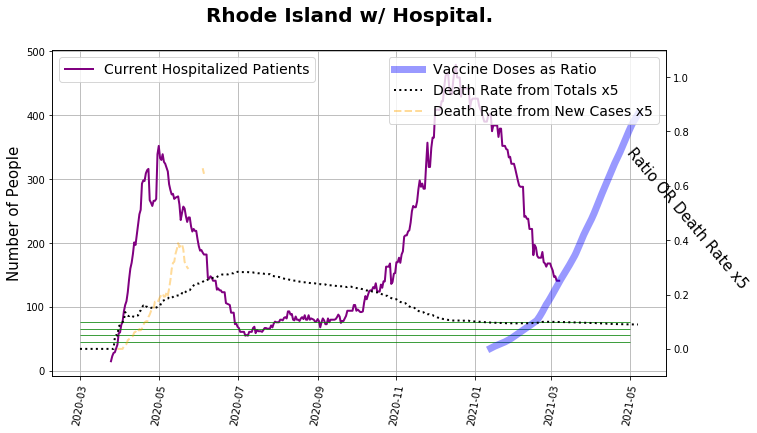

In [34]:
plot_all_info('Rhode Island', amplify=55, offset=7, smooth=True)

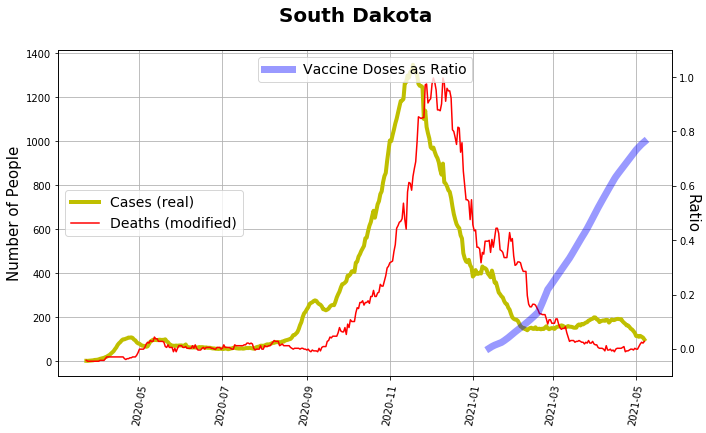

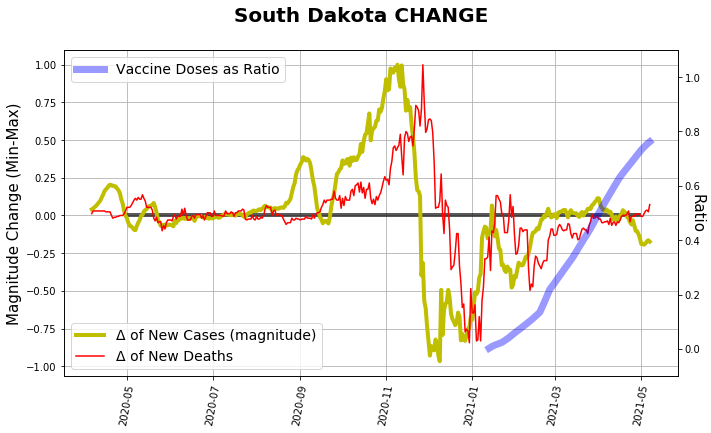

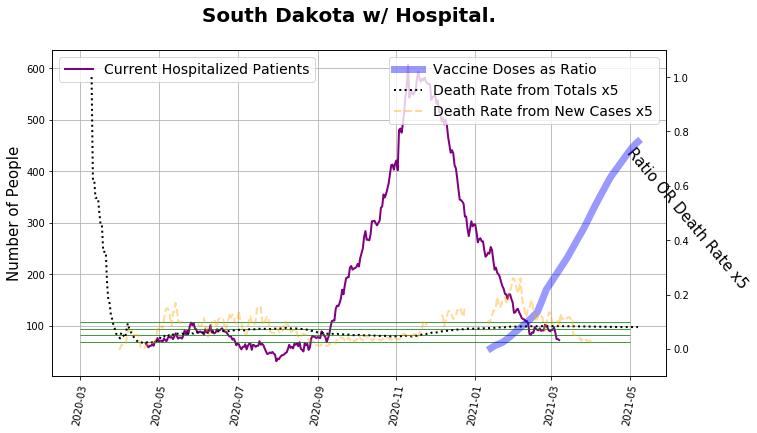

In [41]:
plot_all_info('South Dakota', amplify=55, offset=0, smooth=True)

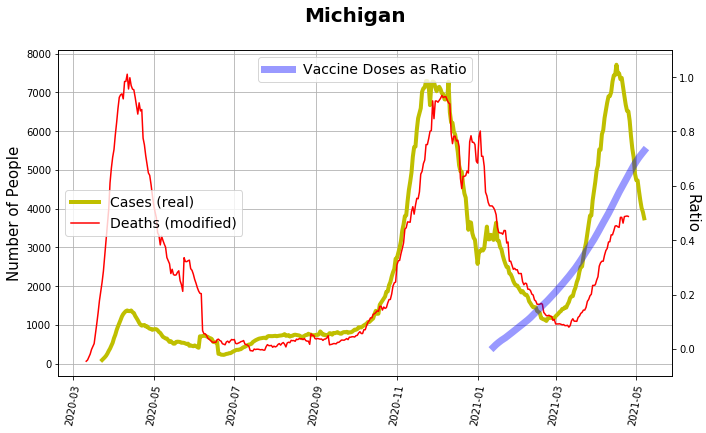

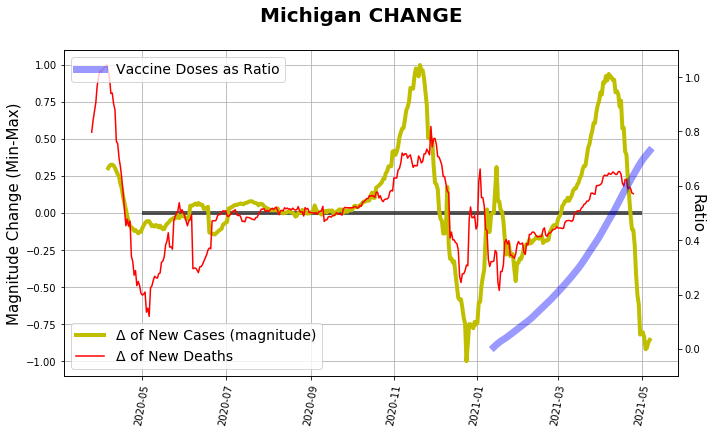

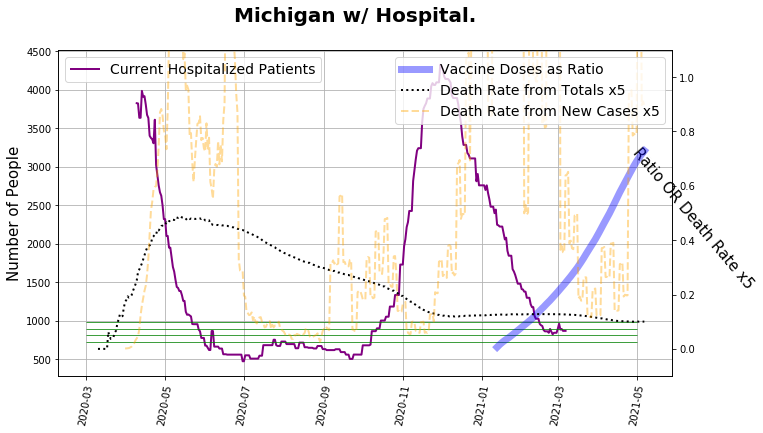

In [43]:
plot_all_info('Michigan', amplify=55, offset=12, smooth=True)

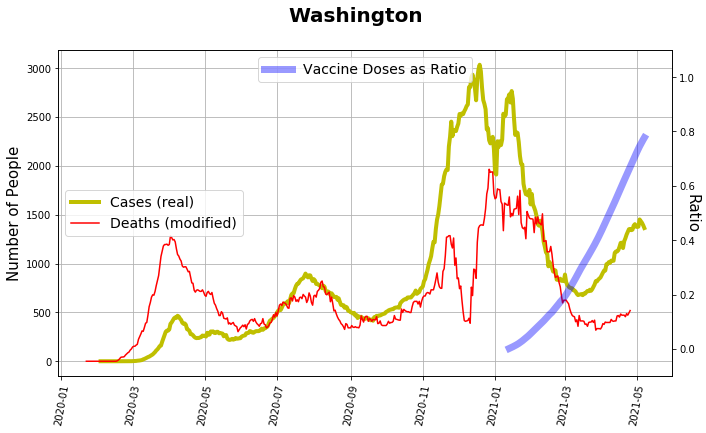

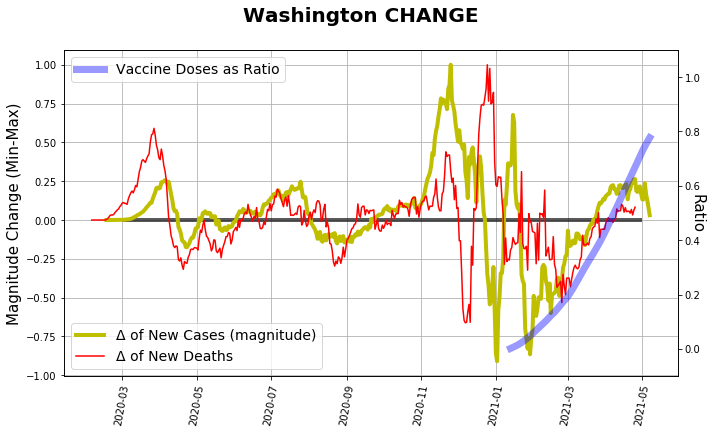

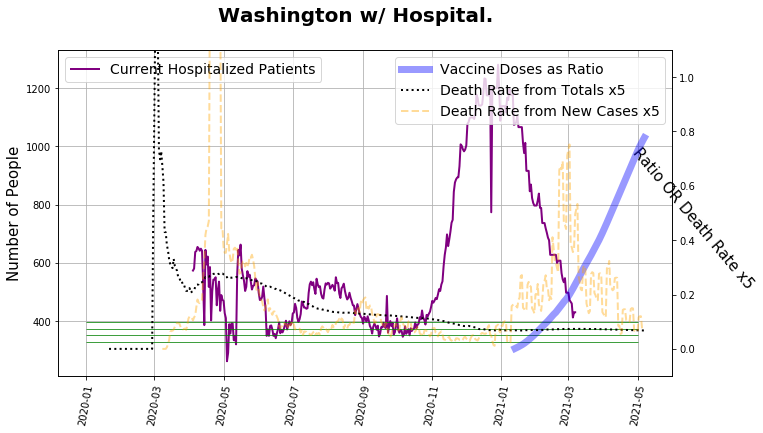

In [37]:
plot_all_info('Washington', amplify=55, offset=12, smooth=True)

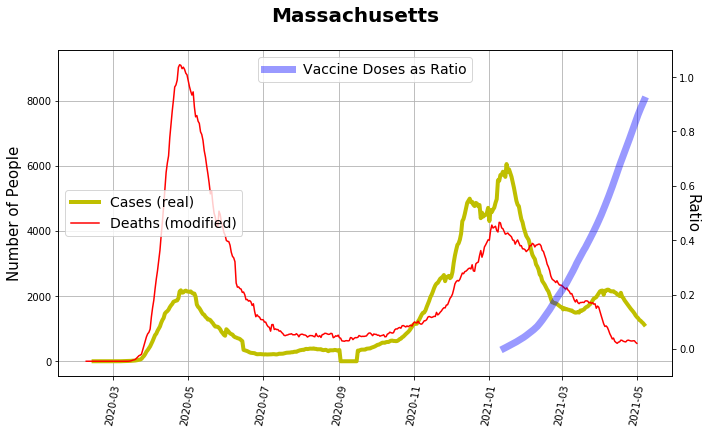

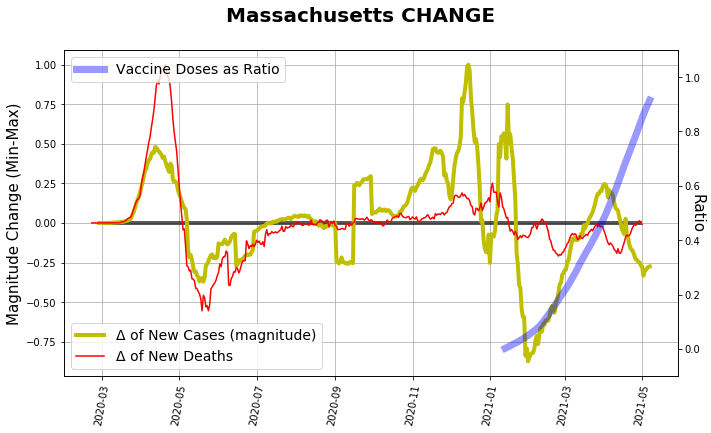

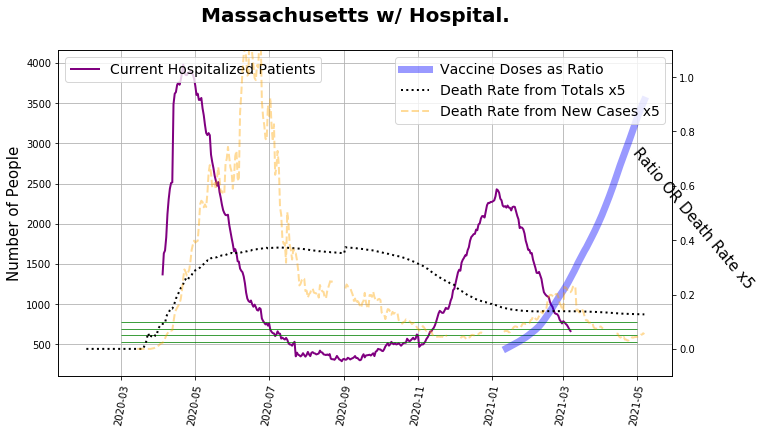

In [38]:
plot_all_info('Massachusetts', amplify=55, offset=6, smooth=True)

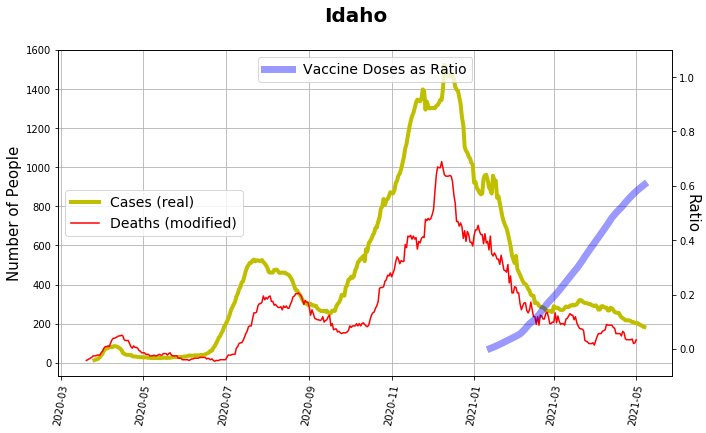

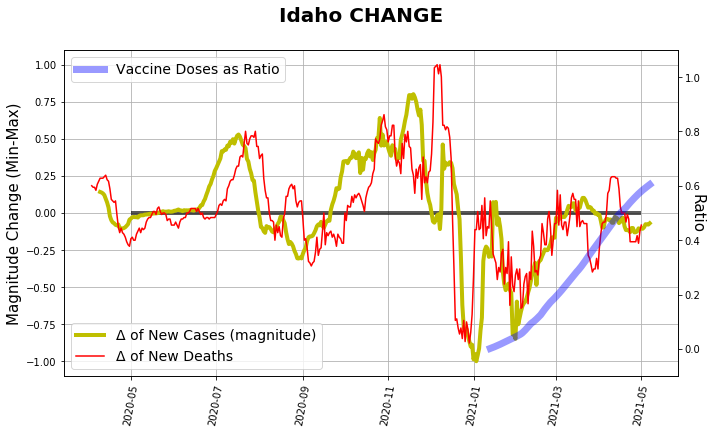

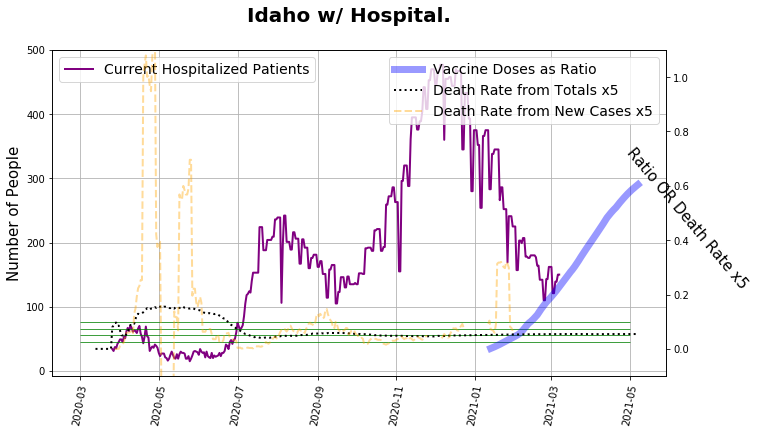

In [39]:
plot_all_info('Idaho', amplify=55, offset=6, smooth=True)